# Очистка даних

## 1. Неіменовані дані

In [1]:
data <- read.csv("https://raw.githubusercontent.com/kleban/r-book-published/main/datasets/untitled.csv")

In [2]:
data

X23,X185,X85.7,Male
<int>,<chr>,<dbl>,<chr>
41,175,68.3,M
11,142*,55.4,Female
12,NA,48.2,Man
54,171,NA,Looks like a man
32,168,78.0,F


```
23,185,85.7,Male
41,175,68.3,M
11,142*,55.4,Female
12,NA,48.2,Man
54,171,NA,Looks like a man
32,168,78,F
```

In [3]:
data <- read.csv("https://raw.githubusercontent.com/kleban/r-book-published/main/datasets/untitled.csv", header = F)
data

V1,V2,V3,V4
<int>,<chr>,<dbl>,<chr>
23,185,85.7,Male
41,175,68.3,M
11,142*,55.4,Female
12,NA,48.2,Man
54,171,NA,Looks like a man
32,168,78.0,F


In [4]:
data <- read.csv("https://raw.githubusercontent.com/kleban/r-book-published/main/datasets/untitled.csv",
                 header = F,
                col.names = c("Age", "Height", "Weight", "Gender"))
data

Age,Height,Weight,Gender
<int>,<chr>,<dbl>,<chr>
23,185,85.7,Male
41,175,68.3,M
11,142*,55.4,Female
12,NA,48.2,Man
54,171,NA,Looks like a man
32,168,78.0,F


In [5]:
colnames(data) <- c("A", "H", "W", "G")

In [6]:
data

A,H,W,G
<int>,<chr>,<dbl>,<chr>
23,185,85.7,Male
41,175,68.3,M
11,142*,55.4,Female
12,NA,48.2,Man
54,171,NA,Looks like a man
32,168,78.0,F


In [7]:
colnames(data)[2] <- "HEIGHT"

In [8]:
data

A,HEIGHT,W,G
<int>,<chr>,<dbl>,<chr>
23,185,85.7,Male
41,175,68.3,M
11,142*,55.4,Female
12,NA,48.2,Man
54,171,NA,Looks like a man
32,168,78.0,F


In [11]:
library(dplyr)

In [13]:
data <- data |>
    rename(H = HEIGHT)
data

A,H,W,G
<int>,<chr>,<dbl>,<chr>
23,185,85.7,Male
41,175,68.3,M
11,142*,55.4,Female
12,NA,48.2,Man
54,171,NA,Looks like a man
32,168,78.0,F


## Погано іменовані

In [14]:
data <- read.csv("https://raw.githubusercontent.com/kleban/r-book-published/main/datasets/badtitled.csv")
data

Person.Age,Person__Height,person.Weight,Person.Gender,empty
<int>,<chr>,<dbl>,<chr>,<lgl>
23,185,NA,Male,NA
41,175,68.3,M,NA
11,142*,55.4,Female,NA
12,NA,48.2,Man,NA
54,191,NA,female,NA
32,168,78.0,F,NA
22,NA,54.0,male.,NA
21,165,NA,m,NA
14,NA,90.2,Man,NA


In [32]:
#install.packages("janitor")

In [15]:
library(janitor)


Attaching package: 'janitor'


The following objects are masked from 'package:stats':

    chisq.test, fisher.test




In [16]:
colnames(data)

[1] "Person.Age"     "Person__Height" "person.Weight"  "Person.Gender" 
[5] "empty"

In [17]:
clean_data <- clean_names(data)
colnames(clean_data)

[1] "person_age"    "person_height" "person_weight" "person_gender"
[5] "empty"

In [43]:
?clean_names

clean_names {janitor},R Documentation
dat,the input data.frame.
...,"Arguments passed on to make_clean_names caseThe desired target case (default is ""snake"") will be passed to snakecase::to_any_case() with the exception of ""old_janitor"", which exists only to support legacy code (it preserves the behavior of clean_names() prior to addition of the ""case"" argument (janitor versions <= 0.3.1). ""old_janitor"" is not intended for new code. See to_any_case for a wide variety of supported cases, including ""sentence"" and ""title"" case. replaceA named character vector where the name is replaced by the value. asciiConvert the names to ASCII (TRUE, default) or not (FALSE). use_make_namesShould make.names() be applied to ensure that the output is usable as a name without quoting? (Avoiding make.names() ensures that the output is locale-independent but quoting may be required.) allow_dupesAllow duplicates in the returned names (TRUE) or not (FALSE, the default). sep_in(short for separator input) if character, is interpreted as a regular expression (wrapped internally into stringr::regex()). The default value is a regular expression that matches any sequence of non-alphanumeric values. All matches will be replaced by underscores (additionally to ""_"" and "" "", for which this is always true, even if NULL is supplied). These underscores are used internally to split the strings into substrings and specify the word boundaries. parsing_optionAn integer that will determine the parsing_option. 1: ""RRRStudio"" -> ""RRR_Studio"" 2: ""RRRStudio"" -> ""RRRS_tudio"" 3: ""RRRStudio"" -> ""RRRSStudio"". This will become for example ""Rrrstudio"" when we convert to lower camel case. -1, -2, -3: These parsing_options's will suppress the conversion after non-alphanumeric values. 0: no parsing transliterationsA character vector (if not NULL). The entries of this argument need to be elements of stringi::stri_trans_list() (like ""Latin-ASCII"", which is often useful) or names of lookup tables (currently only ""german"" is supported). In the order of the entries the letters of the input string will be transliterated via stringi::stri_trans_general() or replaced via the matches of the lookup table. When named character elements are supplied as part of 'transliterations', anything that matches the names is replaced by the corresponding value. You should use this feature with care in case of case = ""parsed"", case = ""internal_parsing"" and case = ""none"", since for upper case letters, which have transliterations/replacements of length 2, the second letter will be transliterated to lowercase, for example Oe, Ae, Ss, which might not always be what is intended. In this case you can make usage of the option to supply named elements and specify the transliterations yourself. numeralsA character specifying the alignment of numerals (""middle"", left, right, asis or tight). I.e. numerals = ""left"" ensures that no output separator is in front of a digit."


## Очистка текстових даних

In [18]:
data <- read.csv("https://raw.githubusercontent.com/kleban/r-book-published/main/datasets/badtitled.csv")
data

Person.Age,Person__Height,person.Weight,Person.Gender,empty
<int>,<chr>,<dbl>,<chr>,<lgl>
23,185,NA,Male,NA
41,175,68.3,M,NA
11,142*,55.4,Female,NA
12,NA,48.2,Man,NA
54,191,NA,female,NA
32,168,78.0,F,NA
22,NA,54.0,male.,NA
21,165,NA,m,NA
14,NA,90.2,Man,NA


In [21]:
data <- data |> clean_names()
data

person_age,person_height,person_weight,person_gender,empty
<int>,<chr>,<dbl>,<chr>,<lgl>
23,185,NA,Male,NA
41,175,68.3,M,NA
11,142*,55.4,Female,NA
12,NA,48.2,Man,NA
54,191,NA,female,NA
32,168,78.0,F,NA
22,NA,54.0,male.,NA
21,165,NA,m,NA
14,NA,90.2,Man,NA


In [22]:
library(stringr)

In [23]:
gender_data <- as.factor(tolower(str_trim(data$person_gender)))
length(unique(gender_data))

[1] 6

In [24]:
as.numeric(gender_data)

[1] 4 3 2 6 2 1 5 3 6 2 1 5 3

In [25]:
str <- " ostroh academy  "
str_trim(str)

[1] "ostroh academy"

In [26]:
str_trim(str, side = "left")

[1] "ostroh academy  "

In [27]:
str_trim(str, side = "right")

[1] " ostroh academy"

In [28]:
str_trim(str, side = "both")

[1] "ostroh academy"

In [29]:
str_pad(57, width = 6, side = "left", pad = 0)

[1] "000057"

In [30]:
toupper(str)

[1] " OSTROH ACADEMY  "

In [31]:
tolower(str)

[1] " ostroh academy  "

In [32]:
adist("oa", "oa")

0


In [33]:
adist("oa", "ao")

2


In [34]:
adist("oa", "ds5te")

5


In [42]:
m <- c("male", "female")
adj_gender <- adist(data$person_gender, m)
colnames(adj_gender) <- m
rownames(adj_gender) <- data$person_gender

In [43]:
colnames(adj_gender) <- m
rownames(adj_gender) <- data$person_gender
adj_gender

,male,female
Male,1,3
M,4,6
Female,2,1
Man,3,5
female,2,0
F,5,6
male.,1,3
m,3,5
Man,3,5
female,2,0


In [44]:
adj_gender <- as.data.frame(adj_gender) #|>
   # distinct()
adj_gender

,male,female
,<dbl>,<dbl>
Male,1,3
X...M,4,6
Female,2,1
Man,3,5
female,2,0
F....,5,6
male.,1,3
m,3,5
Man.1,3,5


In [45]:
nums <- apply(adj_gender, 1, which.min)
nums

Male    X...M   Female      Man   female    F....    male.        m 
       1        1        2        1        2        1        1        1 
   Man.1 female.1  F.....1  male..1      m.1 
       1        2        1        1        1

In [46]:
nums <- unlist(nums)

In [47]:
data.frame(initial = data$person_gender, coded = m[nums])

initial,coded
<chr>,<chr>
Male,male
M,male
Female,female
Man,male
female,female
F,male
male.,male
m,male
Man,male


In [48]:
data <- data |> 
    mutate(person_gender = ifelse(str_trim(person_gender) == "F", "female", person_gender))

In [53]:
data

person_age,person_height,person_weight,person_gender,empty
<int>,<chr>,<dbl>,<chr>,<lgl>
23,185,NA,Male,NA
41,175,68.3,M,NA
11,142*,55.4,Female,NA
12,NA,48.2,Man,NA
54,191,NA,female,NA
32,168,78.0,female,NA
22,NA,54.0,male.,NA
21,165,NA,m,NA
14,NA,90.2,Man,NA


In [56]:
adj_gender <- adist(data$person_gender, m)
adj_gender

1,3
4,6
2,1
3,5
2,0
2,0
1,3
3,5
3,5
2,0
2,0


In [57]:

adj_gender <- adist(data$person_gender, m)

nums <- apply(adj_gender, 1, which.min)
nums

colnames(adj_gender) <- m
rownames(adj_gender) <- data$person_gender
gender_data <- data.frame(initial = data$person_gender, coded = m[nums])
gender_data 


[1] 1 1 2 1 2 2 1 1 1 2 2 1 1

initial,coded
<chr>,<chr>
Male,male
M,male
Female,female
Man,male
female,female
female,female
male.,male
m,male
Man,male


In [58]:
data$person_gender <- gender_data$coded

In [59]:
data

person_age,person_height,person_weight,person_gender,empty
<int>,<chr>,<dbl>,<chr>,<lgl>
23,185,NA,male,NA
41,175,68.3,male,NA
11,142*,55.4,female,NA
12,NA,48.2,male,NA
54,191,NA,female,NA
32,168,78.0,female,NA
22,NA,54.0,male,NA
21,165,NA,male,NA
14,NA,90.2,male,NA


In [60]:
data <- data |>
    mutate(person_height = str_remove(person_height, pattern = "[*]"),
          person_height = as.numeric(person_height))

In [117]:
data

person_age,person_height,person_weight,person_gender,empty
<int>,<dbl>,<dbl>,<chr>,<lgl>
23,185,NA,male,NA
41,175,68.3,male,NA
11,142,55.4,female,NA
12,NA,48.2,male,NA
54,191,NA,female,NA
32,168,78.0,male,NA
22,NA,54.0,male,NA
21,165,NA,male,NA
14,NA,90.2,male,NA


In [61]:
write.csv(data, "data/cleaned1.csv", row.names = F)

## Заміна пропусків

In [62]:
data <- read.csv("data/cleaned1.csv")
data

person_age,person_height,person_weight,person_gender,empty
<int>,<int>,<dbl>,<chr>,<lgl>
23,185,NA,male,NA
41,175,68.3,male,NA
11,142,55.4,female,NA
12,NA,48.2,male,NA
54,191,NA,female,NA
32,168,78.0,female,NA
22,NA,54.0,male,NA
21,165,NA,male,NA
14,NA,90.2,male,NA


In [124]:
#install.packages("mice")

In [64]:
library(mice)

,person_age,person_gender,person_height,person_weight,empty,
4,1,1,1,1,0,1
5,1,1,1,0,0,2
4,1,1,0,1,0,2
,0,0,4,5,13,22


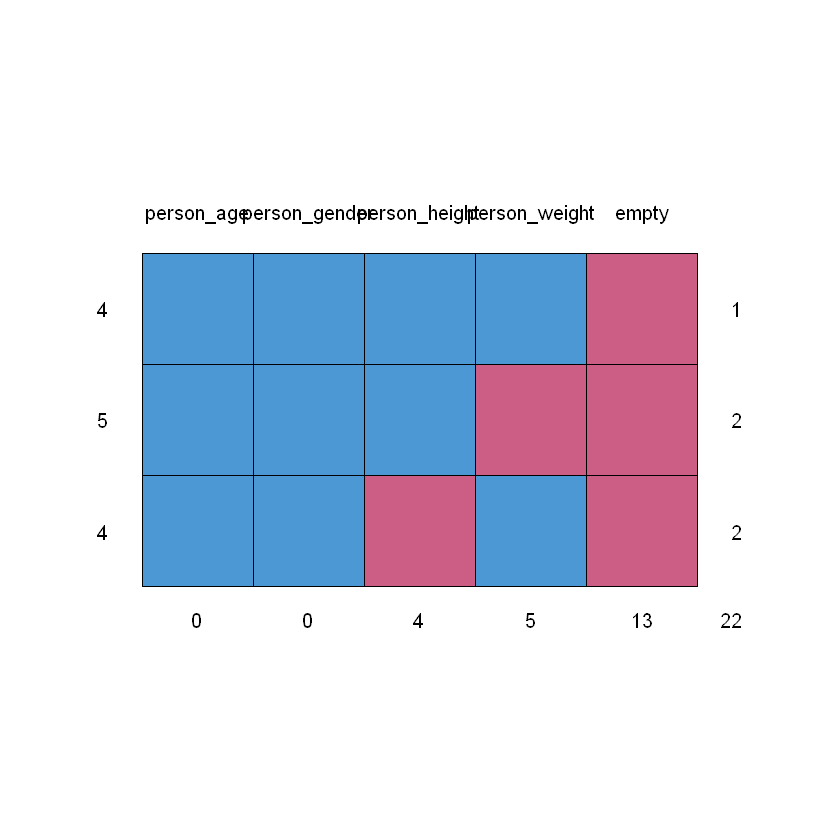

In [65]:
md.pattern(data)

In [133]:
#install.packages("VIM")

In [66]:
library(VIM)

Loading required package: colorspace

Loading required package: grid

VIM is ready to use.


Suggestions and bug-reports can be submitted at: https://github.com/statistikat/VIM/issues


Attaching package: 'VIM'


The following object is masked from 'package:datasets':

    sleep





 Variables sorted by number of missings: 
      Variable     Count
         empty 1.0000000
 person_weight 0.3846154
 person_height 0.3076923
    person_age 0.0000000
 person_gender 0.0000000



 Missings in variables:
      Variable Count
 person_height     4
 person_weight     5
         empty    13

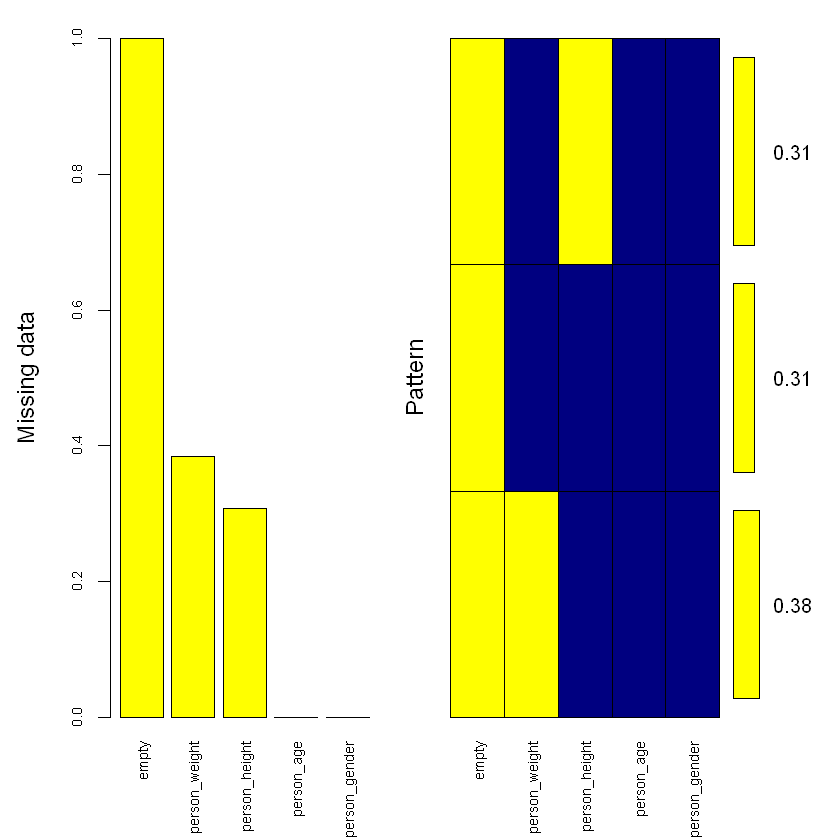

In [67]:
mice_plot <- aggr(data, 
                  col=c('navyblue','yellow'),
                  numbers=TRUE, 
                  sortVars=TRUE,
                  labels=names(data), 
                  cex.axis=.7,
                  gap=3, 
                  ylab=c("Missing data","Pattern"))
mice_plot

In [140]:
#install.packages("Amelia")

also installing the dependency 'RcppArmadillo'





  There is a binary version available but the source version is later:
                  binary     source needs_compilation
RcppArmadillo 0.12.2.0.0 0.12.8.2.1              TRUE

  Binaries will be installed
package 'RcppArmadillo' successfully unpacked and MD5 sums checked
package 'Amelia' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\User\AppData\Local\Temp\RtmpcNFcIt\downloaded_packages


Loading required package: Rcpp

## 
## Amelia II: Multiple Imputation
## (Version 1.8.1, built: 2022-11-18)
## Copyright (C) 2005-2024 James Honaker, Gary King and Matthew Blackwell
## Refer to http://gking.harvard.edu/amelia/ for more information
## 



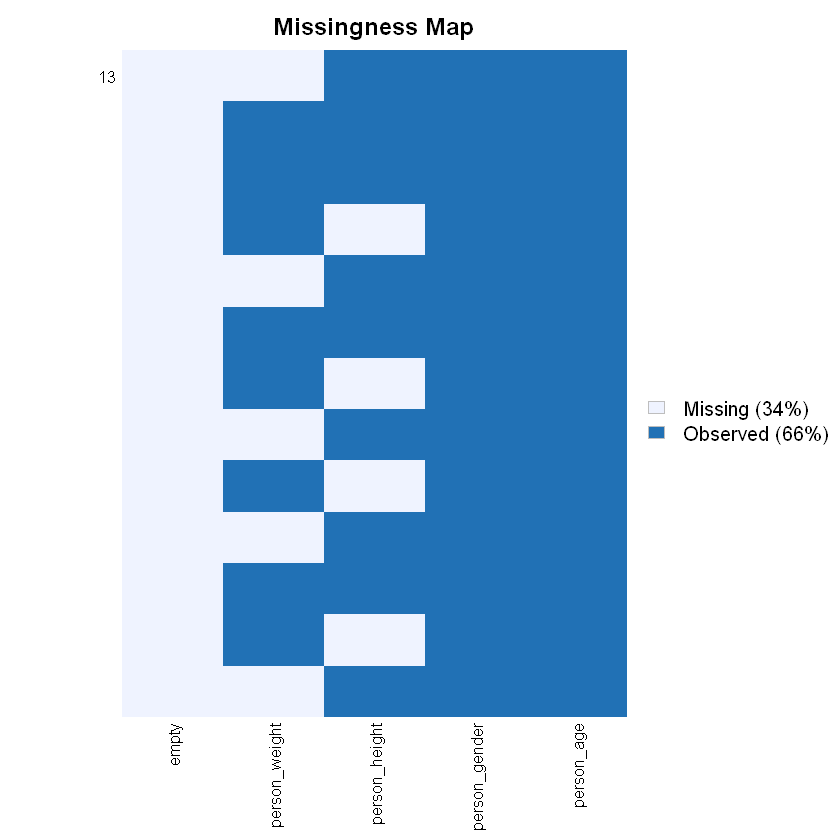

In [68]:
library(Amelia)
missmap(data)

In [69]:
colnames(data)[apply(data, 2, anyNA)]

[1] "person_height" "person_weight" "empty"

In [146]:
anyNA(data)

[1] TRUE

In [70]:
data

person_age,person_height,person_weight,person_gender,empty
<int>,<int>,<dbl>,<chr>,<lgl>
23,185,NA,male,NA
41,175,68.3,male,NA
11,142,55.4,female,NA
12,NA,48.2,male,NA
54,191,NA,female,NA
32,168,78.0,female,NA
22,NA,54.0,male,NA
21,165,NA,male,NA
14,NA,90.2,male,NA


In [71]:
complete.cases(data)

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[13] FALSE

In [72]:
# data$empty <- NULL

cleaned_data <- data |> remove_empty(which = c("cols", "rows"))
cleaned_data

,person_age,person_height,person_weight,person_gender
,<int>,<int>,<dbl>,<chr>
1,23,185,NA,male
2,41,175,68.3,male
3,11,142,55.4,female
4,12,NA,48.2,male
5,54,191,NA,female
6,32,168,78.0,female
7,22,NA,54.0,male
8,21,165,NA,male
9,14,NA,90.2,male


In [73]:
cleaned_data[complete.cases(cleaned_data),]

,person_age,person_height,person_weight,person_gender
,<int>,<int>,<dbl>,<chr>
2,41,175,68.3,male
3,11,142,55.4,female
6,32,168,78.0,female
11,41,20,81.0,female


In [74]:
na.omit(cleaned_data)

,person_age,person_height,person_weight,person_gender
,<int>,<int>,<dbl>,<chr>
2,41,175,68.3,male
3,11,142,55.4,female
6,32,168,78.0,female
11,41,20,81.0,female


In [75]:
data |>
    mutate(person_weight = ifelse(is.na(person_weight), 0, person_weight))

person_age,person_height,person_weight,person_gender,empty
<int>,<int>,<dbl>,<chr>,<lgl>
23,185,0.0,male,NA
41,175,68.3,male,NA
11,142,55.4,female,NA
12,NA,48.2,male,NA
54,191,0.0,female,NA
32,168,78.0,female,NA
22,NA,54.0,male,NA
21,165,0.0,male,NA
14,NA,90.2,male,NA


In [76]:
library(tidyr)

In [77]:
data |>
    mutate_if(is.numeric, replace_na, replace = 0)

person_age,person_height,person_weight,person_gender,empty
<int>,<int>,<dbl>,<chr>,<lgl>
23,185,0.0,male,NA
41,175,68.3,male,NA
11,142,55.4,female,NA
12,0,48.2,male,NA
54,191,0.0,female,NA
32,168,78.0,female,NA
22,0,54.0,male,NA
21,165,0.0,male,NA
14,0,90.2,male,NA


In [78]:
mean(data$person_weight)

[1] NA

In [79]:
data |>
    mutate(person_weight = ifelse(is.na(person_weight), mean(person_weight, na.rm = T), person_weight))

person_age,person_height,person_weight,person_gender,empty
<int>,<int>,<dbl>,<chr>,<lgl>
23,185,66.7625,male,NA
41,175,68.3000,male,NA
11,142,55.4000,female,NA
12,NA,48.2000,male,NA
54,191,66.7625,female,NA
32,168,78.0000,female,NA
22,NA,54.0000,male,NA
21,165,66.7625,male,NA
14,NA,90.2000,male,NA


In [80]:
data |>
    mutate_if(is.numeric, function(x) ifelse(is.na(x), median(x, na.rm =T), x))

person_age,person_height,person_weight,person_gender,empty
<int>,<int>,<dbl>,<chr>,<lgl>
23,185,63.65,male,NA
41,175,68.30,male,NA
11,142,55.40,female,NA
12,171,48.20,male,NA
54,191,63.65,female,NA
32,168,78.00,female,NA
22,171,54.00,male,NA
21,165,63.65,male,NA
14,171,90.20,male,NA


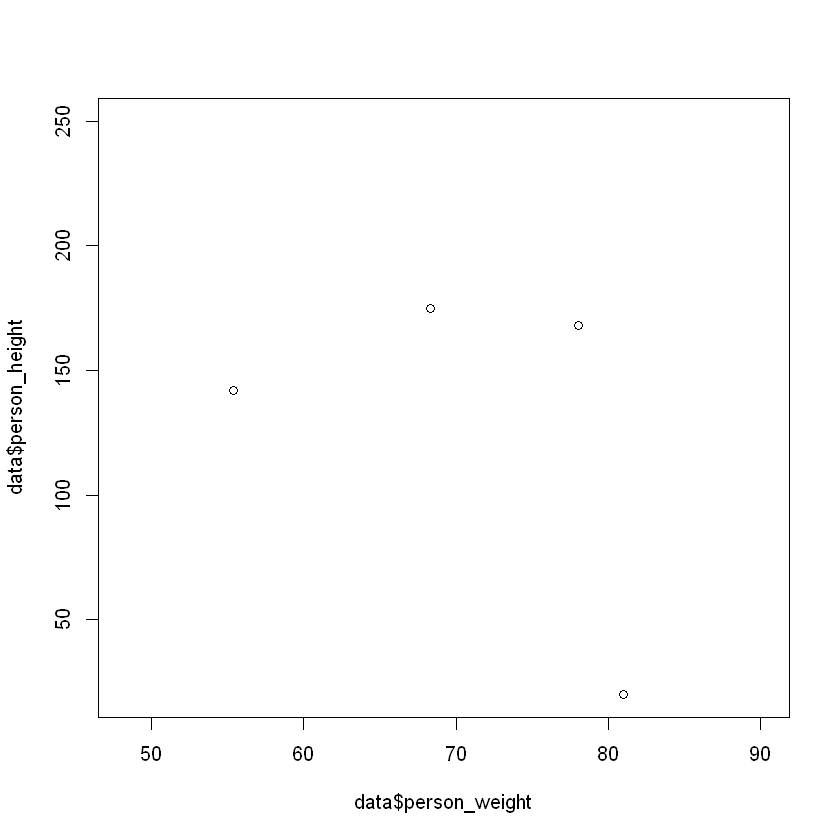

In [81]:
plot(data$person_weight, data$person_height)

In [181]:
#install.packages("Hmisc")

In [82]:
library(Hmisc)


Attaching package: 'Hmisc'


The following objects are masked from 'package:dplyr':

    src, summarize


The following objects are masked from 'package:base':

    format.pval, units




In [191]:
cleaned_data |>
    mutate(person_weight = impute(person_weight, fun = mean))

,person_age,person_height,person_weight,person_gender
,<int>,<int>,<impute>,<chr>
1,23,185,66.7625,male
2,41,175,68.3000,male
3,11,142,55.4000,female
4,12,NA,48.2000,male
5,54,191,66.7625,female
6,32,168,78.0000,male
7,22,NA,54.0000,male
8,21,165,66.7625,male
9,14,NA,90.2000,male


In [84]:
cleaned_data |>
    mutate(person_height = impute(person_height, "random"))

,person_age,person_height,person_weight,person_gender
,<int>,<impute>,<dbl>,<chr>
1,23,185,NA,male
2,41,175,68.3,male
3,11,142,55.4,female
4,12,250,48.2,male
5,54,191,NA,female
6,32,168,78.0,female
7,22,250,54.0,male
8,21,165,NA,male
9,14,185,90.2,male


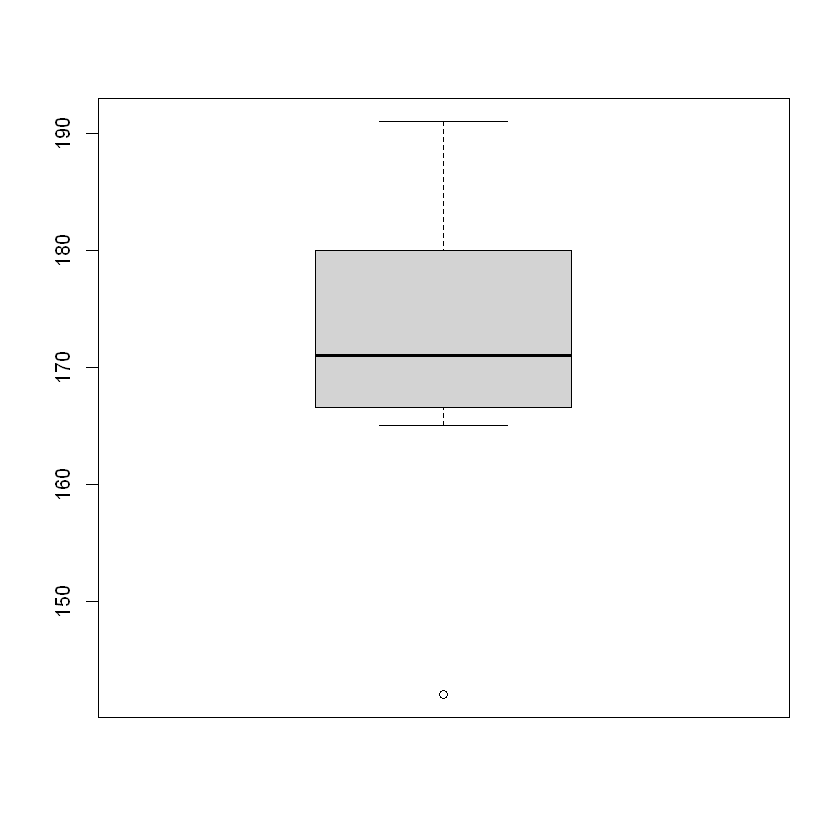

In [87]:
boxplot(data |>
        filter(person_height > 20, person_height < 250) |> 
        select(person_height))

# Обробка викидів

In [94]:
temp <- c(17, 21, 32, 45, 13, 12, 19, 22, 12, 18, 17, 15)

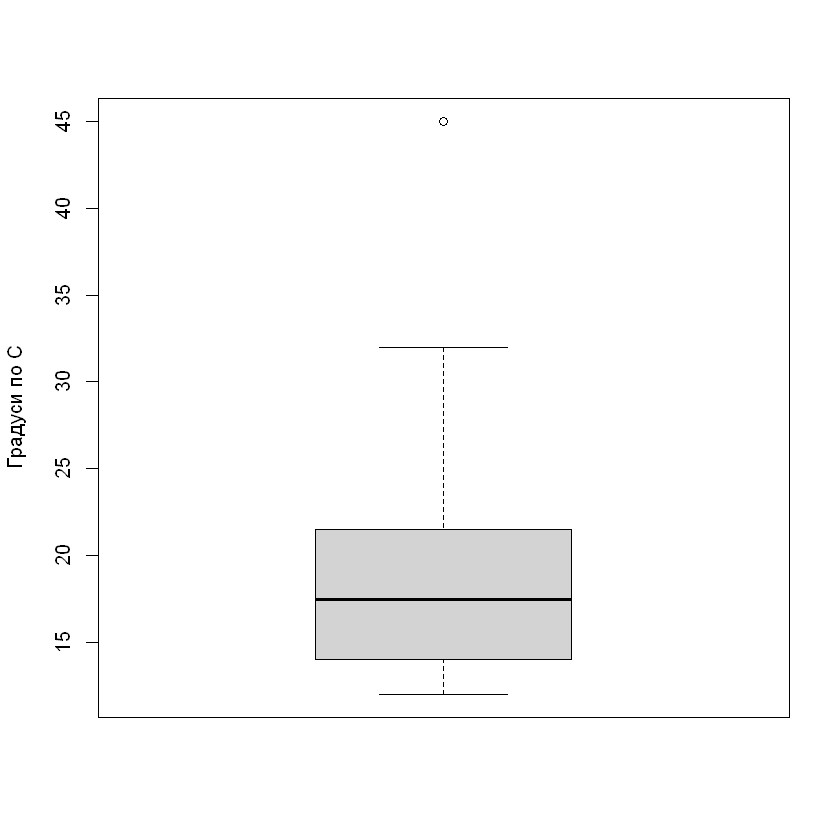

In [96]:
boxplot(temp, ylab = "Градуси по C")

In [98]:
data <- read.csv("https://raw.githubusercontent.com/kleban/r-book-published/main/datasets/river_eco.csv")

In [102]:
data |> head(12)

,index,nitrate,months
,<int>,<dbl>,<chr>
1,1,1.581,January
2,2,1.323,February
3,3,1.140,March
4,4,1.245,April
5,5,1.072,May
6,6,1.483,June
7,7,1.162,July
8,8,1.304,August
9,9,1.140,September


In [105]:
m_levels <- data |> head(12) |> select(months) |> unlist()

In [109]:
data <- data |>
    mutate(months = factor(months, levels = m_levels))
head(data)

,index,nitrate,months
,<int>,<dbl>,<fct>
1,1,1.581,January
2,2,1.323,February
3,3,1.140,March
4,4,1.245,April
5,5,1.072,May
6,6,1.483,June


In [111]:
summary(data)

     index          nitrate            months   
 Min.   :  1.0   Min.   :0.5920   January : 25  
 1st Qu.: 73.5   1st Qu.:0.9485   February: 25  
 Median :146.0   Median :1.0680   March   : 25  
 Mean   :146.0   Mean   :1.0649   April   : 24  
 3rd Qu.:218.5   3rd Qu.:1.1700   May     : 24  
 Max.   :291.0   Max.   :1.8970   June    : 24  
                                  (Other) :144  

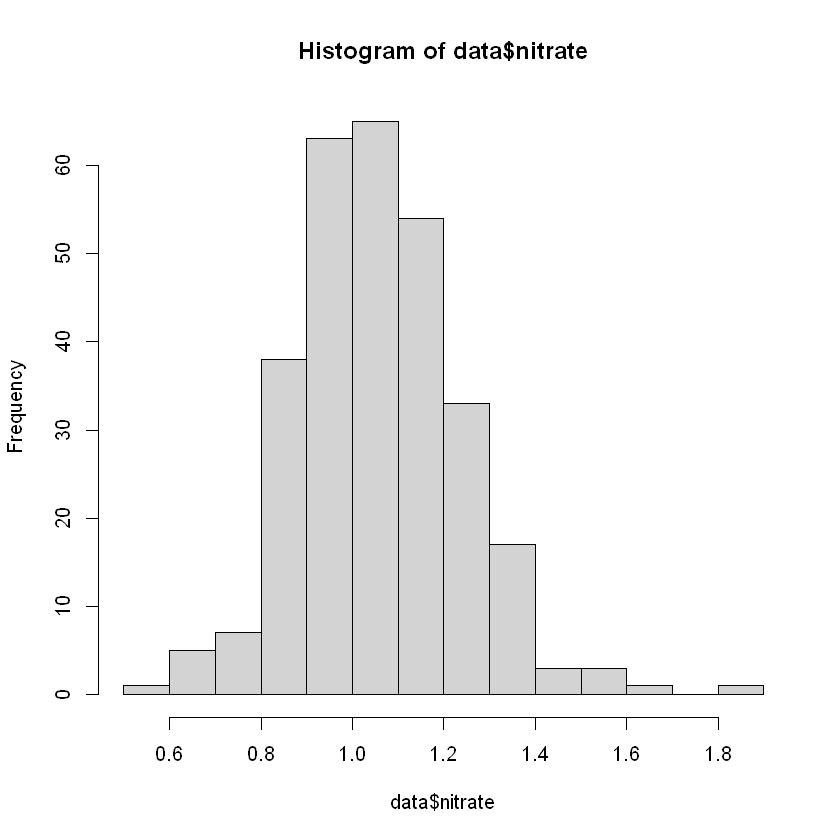

In [113]:
hist(data$nitrate)

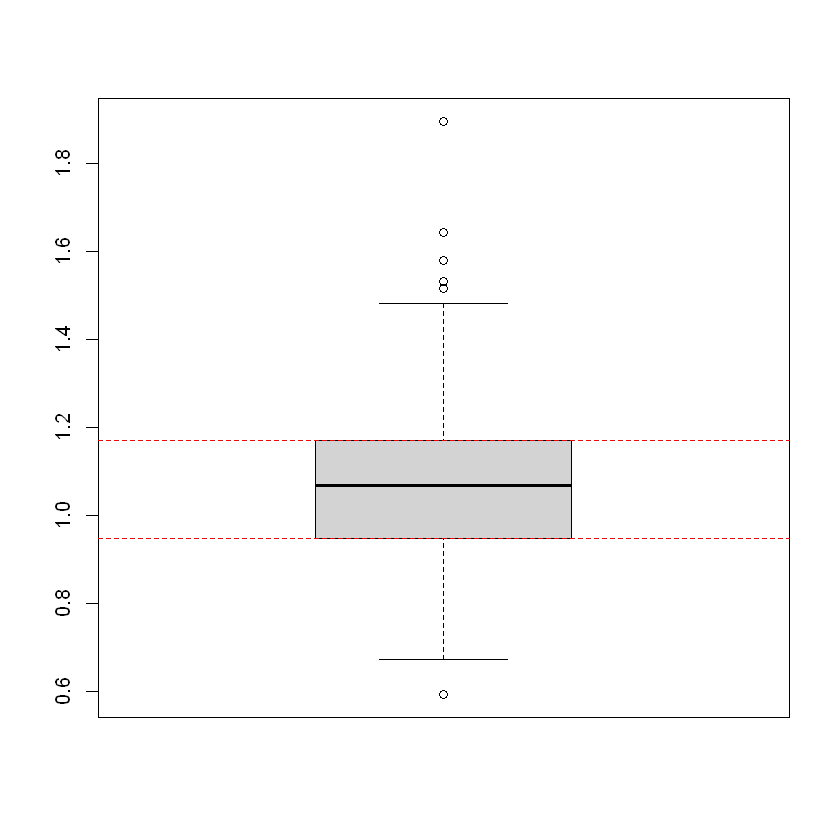

In [115]:
boxplot(data$nitrate)

abline(h=quantile(data$nitrate,0.25), col="red", lty=2)
abline(h=quantile(data$nitrate,0.75), col="red",lty=2)

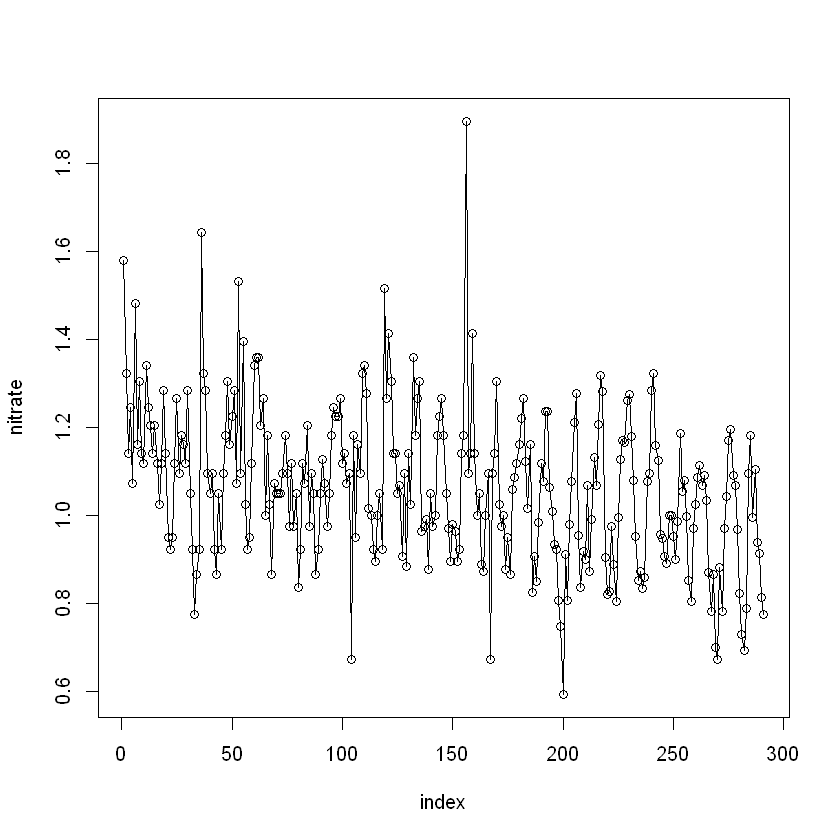

In [117]:
plot(nitrate ~ index, data = data, type = "o")

In [121]:
grouped <- data |>
    group_by(months) |>
    summarise(nitrates_mean = mean(nitrate))

In [123]:
grouped

months,nitrates_mean
<fct>,<dbl>
January,1.2163600
February,1.1838400
March,1.1050400
April,1.0166250
May,0.9978333
June,0.9792083
July,0.9810417
August,0.9380833
September,0.9885833


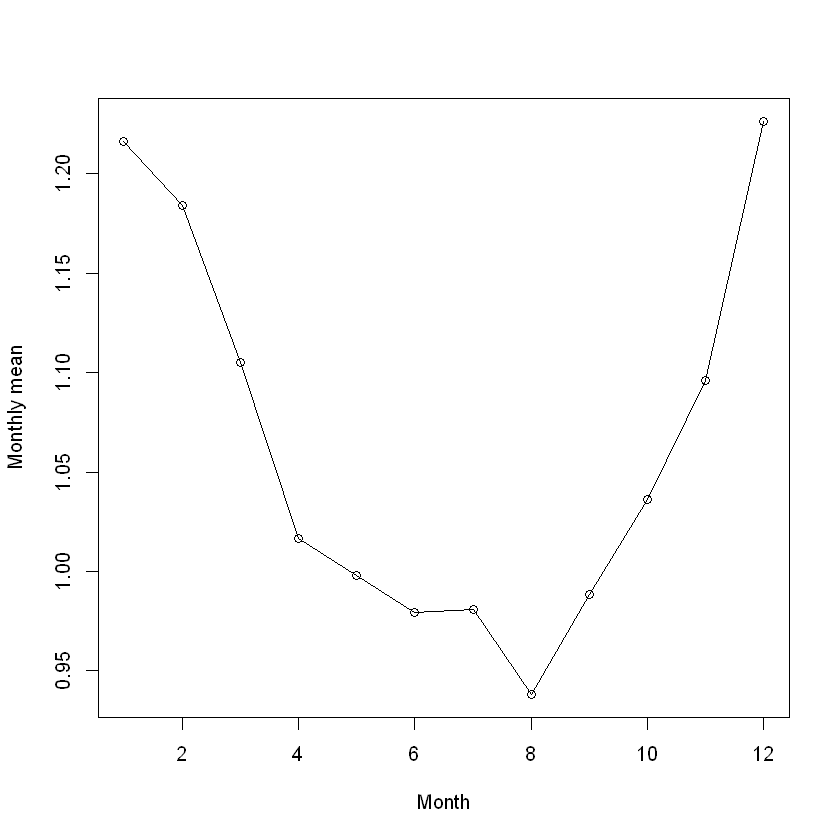

In [125]:
plot(grouped$nitrates_mean, type = "o", xlab = "Month", ylab = "Monthly mean")

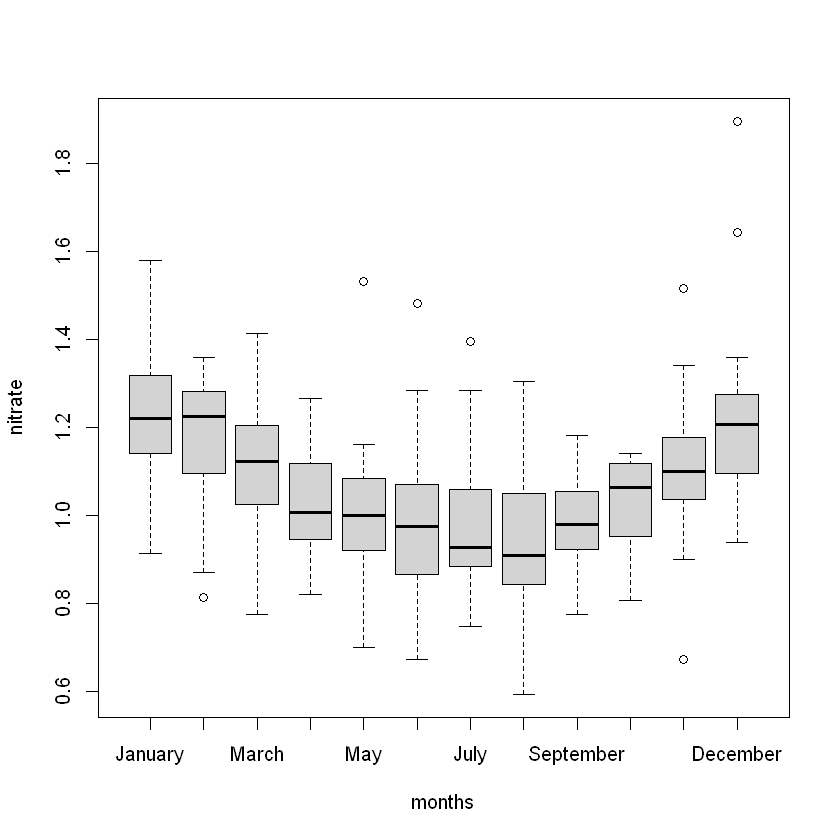

In [127]:
boxplot(nitrate ~ months, data = data)

In [135]:
data |> head()

,index,nitrate,months
,<int>,<dbl>,<fct>
1,1,1.581,January
2,2,1.323,February
3,3,1.140,March
4,4,1.245,April
5,5,1.072,May
6,6,1.483,June


In [138]:
model_data <- data |>
    mutate(m_index = as.numeric(months))
model_data |> head(15)

,index,nitrate,months,m_index
,<int>,<dbl>,<fct>,<dbl>
1,1,1.581,January,1
2,2,1.323,February,2
3,3,1.140,March,3
4,4,1.245,April,4
5,5,1.072,May,5
6,6,1.483,June,6
7,7,1.162,July,7
8,8,1.304,August,8
9,9,1.140,September,9


In [148]:
model <- lm(nitrate ~ log(m_index), data = model_data)

In [149]:
summary(model)


Call:
lm(formula = nitrate ~ log(m_index), data = model_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.44781 -0.11087  0.00132  0.09941  0.88109 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.16237    0.02485  46.776  < 2e-16 ***
log(m_index) -0.05894    0.01374  -4.289 2.45e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.171 on 289 degrees of freedom
Multiple R-squared:  0.05984,	Adjusted R-squared:  0.05658 
F-statistic: 18.39 on 1 and 289 DF,  p-value: 2.452e-05


In [147]:
nitrate = 1.1 + -0.005510*m_index

ERROR: Error in eval(expr, envir, enclos): object 'm_index' not found


R1 = 0.0118 - 0.02041 - 0.02247
R2 = 0.05984 - 0.08065 - 0.08471

In [161]:
model_data$nitrate_upd <- model_data$nitrate
qnt <- quantile(model_data$nitrate_upd, probs=c(.1, .9), na.rm = T)
H <- 1.5 * IQR(qnt[1], na.rm = T)
model_data$nitrate_upd[model_data$nitrate_upd < (qnt[1] - H)] <- qnt[1]
model_data$nitrate_upd[model_data$nitrate_upd > (qnt[2] + H)] <- qnt[2]

In [162]:
mean(model_data$nitrate_upd)
mean(model_data$nitrate)

[1] 1.063038

[1] 1.064852

In [166]:
model3 <- lm(nitrate_upd ~ log(m_index), data = model_data)

In [167]:
summary(model3)


Call:
lm(formula = nitrate_upd ~ log(m_index), data = model_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.25089 -0.11121  0.00282  0.09995  0.26760 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.15399    0.01922  60.047  < 2e-16 ***
log(m_index) -0.05497    0.01063  -5.172 4.34e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1322 on 289 degrees of freedom
Multiple R-squared:  0.08471,	Adjusted R-squared:  0.08155 
F-statistic: 26.75 on 1 and 289 DF,  p-value: 4.338e-07
